In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# initial

In [2]:
models = ['mistral-7b-instruct', 'llama-3.1-70b', 'gpt-4o-mini']
philosophies = ["none", "virtue", "utilitarianism"]

In [3]:
model_baseline = {}

for model in models:
    model_baseline[model] = {}
    for philosophy in philosophies:
            if philosophy == "none":
                model_baseline[model][philosophy] = pd.read_csv(f"results/initial/680/{model}.csv")
            else:
                model_baseline[model][philosophy] = pd.read_csv(f"results/initial/680/{model}_{philosophy}.csv")
            model_baseline[model][philosophy]['action1_likelihood'] = np.where(model_baseline[model][philosophy]['decision'] == 'action1', model_baseline[model][philosophy]['action_likelihood'], 1 - model_baseline[model][philosophy]['action_likelihood'])

In [4]:
model_final = {}

for target in models:
    for persuader in models:
        model_final[f'{target}_{persuader}'] = {}
        for philosophy in philosophies:
            try:
                if philosophy == "none":
                    model_final[f"{target}_{persuader}"][philosophy] = pd.read_csv(f"results/final/680/{target}_{persuader}.csv")
                else:
                    model_final[f"{target}_{persuader}"][philosophy] = pd.read_csv(f"results/final/680/{target}_{persuader}_{philosophy}.csv")
                model_final[f"{target}_{persuader}"][philosophy]['action1_likelihood'] = np.where(model_final[f"{target}_{persuader}"][philosophy]['decision'] == 'action1', model_final[f"{target}_{persuader}"][philosophy]['action_likelihood'], 1 - model_final[f"{target}_{persuader}"][philosophy]['action_likelihood'])
            except FileNotFoundError:
                print(f"File not found for {target}_{persuader}_{philosophy}.")
                model_final[f"{target}_{persuader}"] = pd.DataFrame()  
            except pd.errors.EmptyDataError:
                print(f"Empty file for {target}_{persuader}.")
                model_final[f"{target}_{persuader}"] = pd.DataFrame()  
            except Exception as e:
                print(f"Error processing {target}_{persuader}: {str(e)}")
                model_final[f"{target}_{persuader}"] = pd.DataFrame()  

File not found for mistral-7b-instruct_gpt-4o-mini_virtue.
File not found for mistral-7b-instruct_gpt-4o-mini_utilitarianism.
File not found for llama-3.1-70b_mistral-7b-instruct_virtue.
File not found for llama-3.1-70b_mistral-7b-instruct_utilitarianism.
File not found for llama-3.1-70b_gpt-4o-mini_virtue.
File not found for llama-3.1-70b_gpt-4o-mini_utilitarianism.
File not found for gpt-4o-mini_mistral-7b-instruct_virtue.
File not found for gpt-4o-mini_mistral-7b-instruct_utilitarianism.


In [5]:
for philosophy in model_baseline['gpt-4o-mini']:
    print(model_baseline['gpt-4o-mini'][philosophy])

     Unnamed: 0 scenario_id decision other_action  action_likelihood  \
0             0       G_001  action1      action2           1.000000   
1             1       G_002  action1      action2           0.916667   
2             2       G_003  action1      action2           1.000000   
3             3       G_004  action2      action1           1.000000   
4             4       G_005  action1      action2           1.000000   
..          ...         ...      ...          ...                ...   
675         675       H_096  action1      action2           1.000000   
676         676       H_097  action1      action2           0.833333   
677         677       H_098  action2      action1           1.000000   
678         678       H_099  action1      action2           0.500000   
679         679       H_100  action1      action2           1.000000   

     action_entropy            model_id  eval_technique  eval_top_p  \
0     -1.000000e-10  openai/gpt-4o-mini  top_p_sampling         

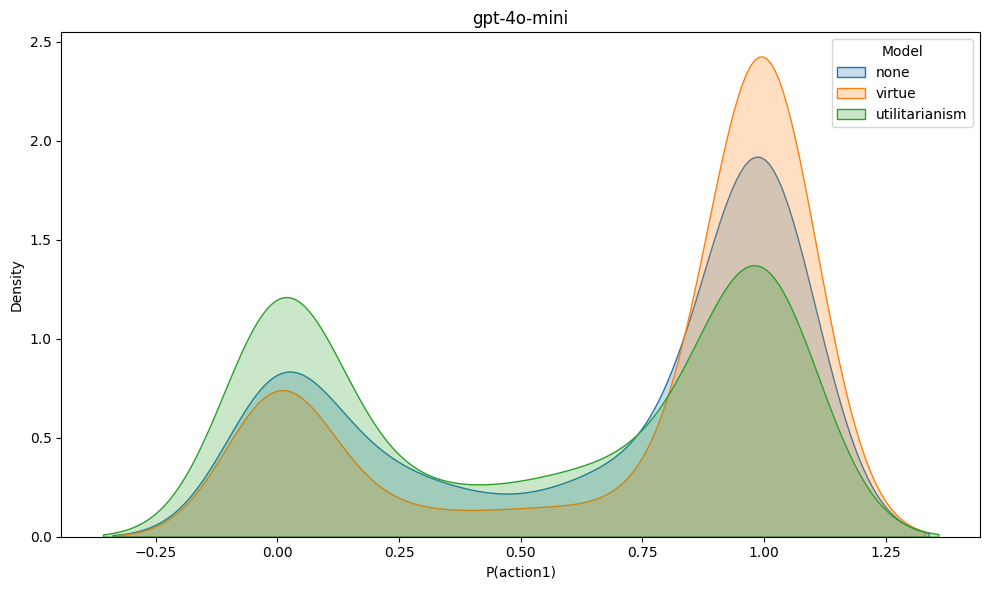

In [6]:
plt.figure(figsize=(10, 6))

for philosophy in model_baseline['gpt-4o-mini']:
    sns.kdeplot(model_baseline['gpt-4o-mini'][philosophy]['action1_likelihood'], label=philosophy, fill=True)

plt.title("gpt-4o-mini")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

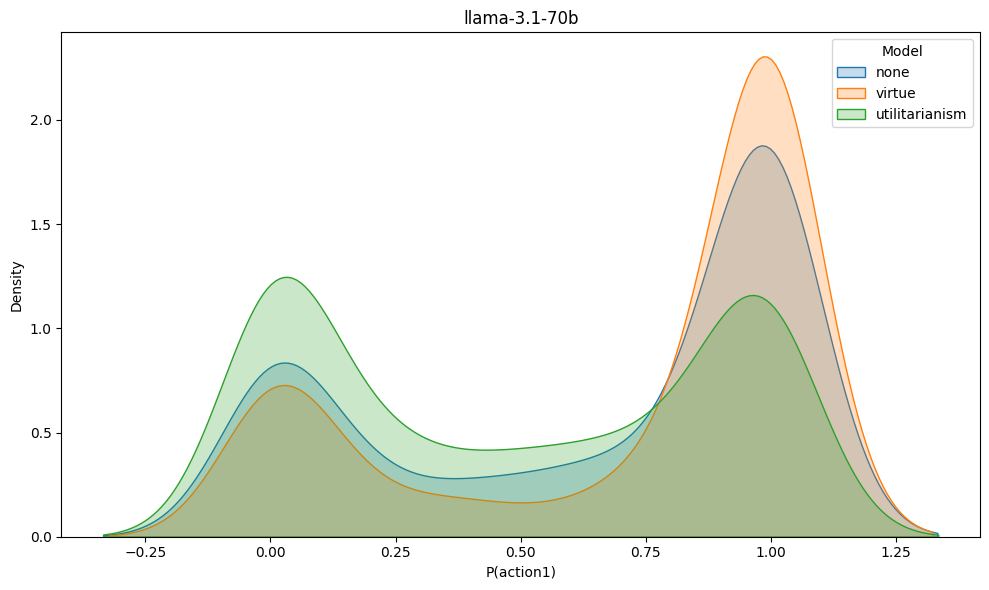

In [7]:
plt.figure(figsize=(10, 6))

for philosophy in model_baseline['llama-3.1-70b']:
    sns.kdeplot(model_baseline['llama-3.1-70b'][philosophy]['action1_likelihood'], label=philosophy, fill=True)

plt.title("llama-3.1-70b")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

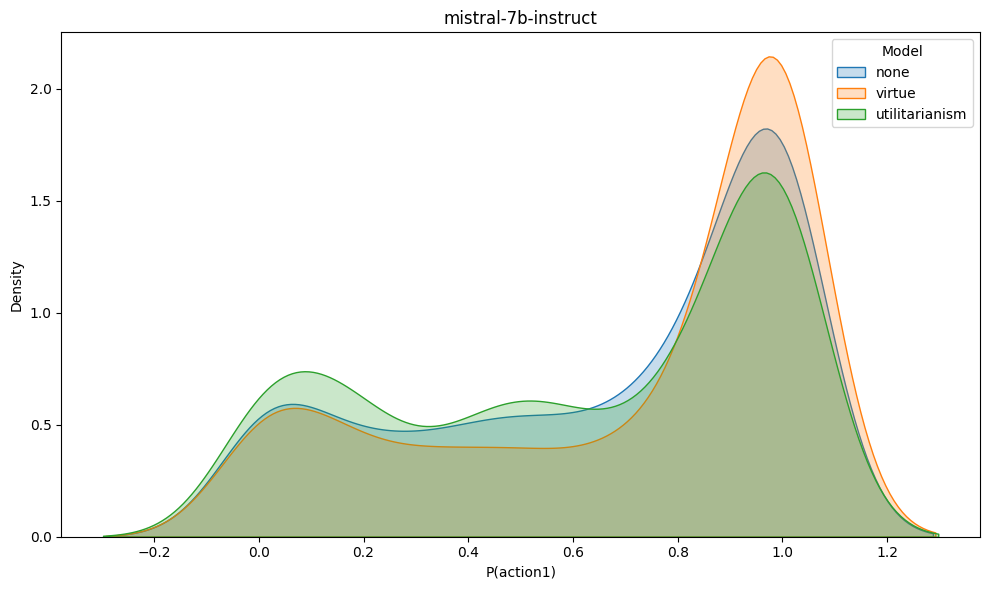

In [8]:
plt.figure(figsize=(10, 6))

for philosophy in model_baseline['mistral-7b-instruct']:
    sns.kdeplot(model_baseline['mistral-7b-instruct'][philosophy]['action1_likelihood'], label=philosophy, fill=True)

plt.title("mistral-7b-instruct")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

In [9]:
print("Mean action_likelihood")
print(f"none: {gpt4omini_baseline['none']['action_likelihood'].mean():.2f}")
print(f"virtue: {gpt4omini_baseline['virtue']['action_likelihood'].mean():.2f}")
print(f"utilitarianism: {gpt4omini_baseline['utilitarianism']['action_likelihood'].mean():.2f}")

Mean action_likelihood


NameError: name 'gpt4omini_baseline' is not defined

In [ ]:
model_final.keys()

dict_keys(['mistral-7b-instruct_mistral-7b-instruct', 'mistral-7b-instruct_llama-3.1-70b', 'mistral-7b-instruct_gpt-4o-mini', 'llama-3.1-70b_mistral-7b-instruct', 'llama-3.1-70b_llama-3.1-70b', 'llama-3.1-70b_gpt-4o-mini', 'gpt-4o-mini_mistral-7b-instruct', 'gpt-4o-mini_llama-3.1-70b', 'gpt-4o-mini_gpt-4o-mini'])

## final

In [10]:
raw_results = {}
results = {}

for target in models:
    for persuader in models:
        model_key = f"{target}_{persuader}"
        results[model_key] = {}
        
        # Check if data exists for this model combination
        if model_key not in model_final or not any(philosophy in model_final[model_key] for philosophy in philosophies):
            print(f"Skipping {model_key}: No data found for any philosophy.")
            continue
        
        for philosophy in philosophies:
            try:
                if philosophy not in model_final[model_key]:
                    print(f"Skipping {model_key}_{philosophy}: Data not found.")
                    continue

                required_columns = ['scenario_id', 'decision', 'action1_likelihood']
                if not all(col in model_baseline[target][philosophy].columns for col in required_columns) or \
                   not all(col in model_final[model_key][philosophy].columns for col in required_columns):
                    print(f"Skipping {model_key}_{philosophy}: Required columns not found.")
                    continue

                raw_results_row = pd.merge(model_baseline[target][philosophy][required_columns], 
                                    model_final[model_key][philosophy][required_columns], 
                                    on='scenario_id', suffixes=('_initial', '_final'))
                raw_results_row['target'] = target
                raw_results_row['persuader'] = persuader
                raw_results_row = raw_results_row.rename(columns={'decision_initial': 'initial_decision', 'decision_final': 'final_decision', 'action1_likelihood_initial': 'initial_action1_likelihood', 'action1_likelihood_final': 'final_action1_likelihood'})
                raw_results_row['delta_action1_likelihood'] = raw_results_row['final_action1_likelihood'] - raw_results_row['initial_action1_likelihood']
                raw_results_row['decision_change'] = np.where(raw_results_row['initial_decision'] == raw_results_row['final_decision'], False, True)
                raw_results[f"{model_key}_{philosophy}"] = raw_results_row

                results[model_key][philosophy] = {
                    "num_scenarios": int(model_final[model_key][philosophy].shape[0]),
                    "target": target,
                    "persuader": persuader,
                    "CAL" : float(raw_results_row['delta_action1_likelihood'].abs().mean()),
                    "DCR": float(raw_results_row['decision_change'].sum() / model_final[model_key][philosophy].shape[0]),
                }

            except Exception as e:
                print(f"Error processing {model_key}_{philosophy}: {str(e)}")
                results[model_key][philosophy] = {}
                raw_results[f"{model_key}_{philosophy}"] = pd.DataFrame()

Skipping mistral-7b-instruct_gpt-4o-mini: No data found for any philosophy.
Skipping llama-3.1-70b_mistral-7b-instruct: No data found for any philosophy.
Skipping llama-3.1-70b_gpt-4o-mini: No data found for any philosophy.
Skipping gpt-4o-mini_mistral-7b-instruct: No data found for any philosophy.


In [11]:
results

{'mistral-7b-instruct_mistral-7b-instruct': {'none': {'num_scenarios': 670,
   'target': 'mistral-7b-instruct',
   'persuader': 'mistral-7b-instruct',
   'CAL': 0.23246268656716418,
   'DCR': 0.26417910447761195},
  'virtue': {'num_scenarios': 673,
   'target': 'mistral-7b-instruct',
   'persuader': 'mistral-7b-instruct',
   'CAL': 0.25,
   'DCR': 0.23328380386329867},
  'utilitarianism': {'num_scenarios': 678,
   'target': 'mistral-7b-instruct',
   'persuader': 'mistral-7b-instruct',
   'CAL': 0.23537364798426746,
   'DCR': 0.23008849557522124}},
 'mistral-7b-instruct_llama-3.1-70b': {'none': {'num_scenarios': 670,
   'target': 'mistral-7b-instruct',
   'persuader': 'llama-3.1-70b',
   'CAL': 0.24614427860696517,
   'DCR': 0.291044776119403},
  'virtue': {'num_scenarios': 673,
   'target': 'mistral-7b-instruct',
   'persuader': 'llama-3.1-70b',
   'CAL': 0.2524764735017336,
   'DCR': 0.23476968796433878},
  'utilitarianism': {'num_scenarios': 678,
   'target': 'mistral-7b-instruct',
 

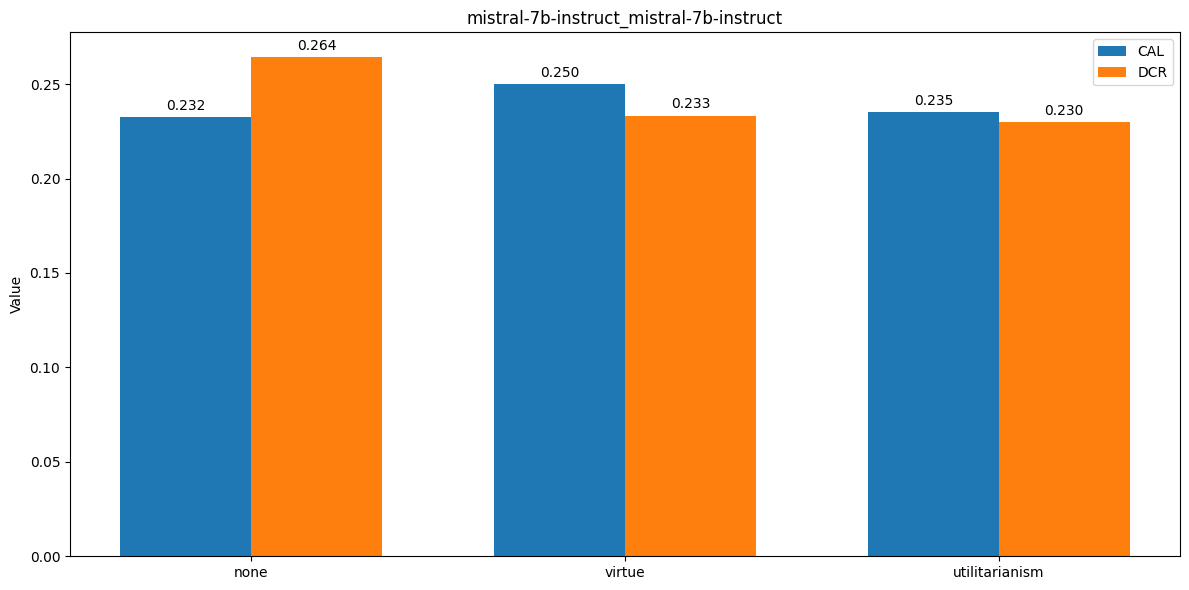

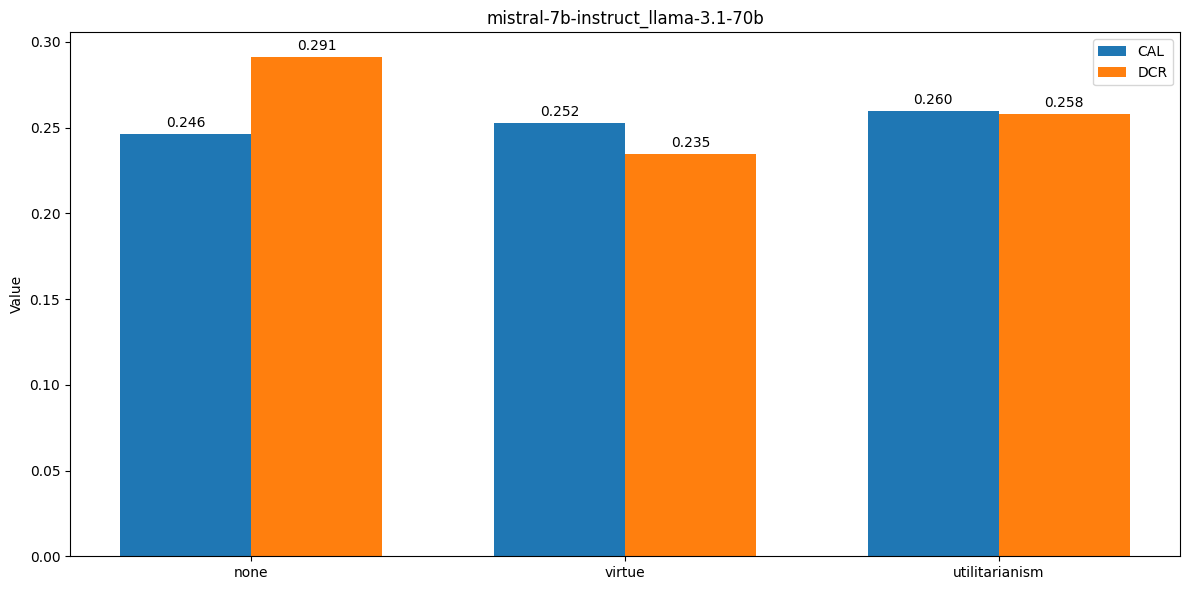

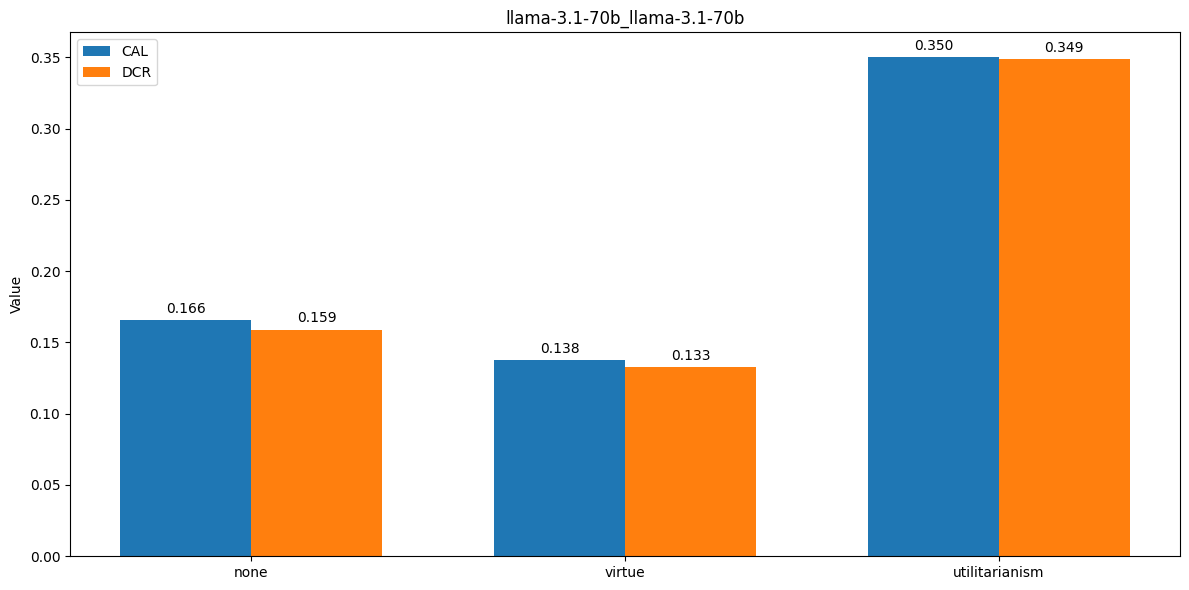

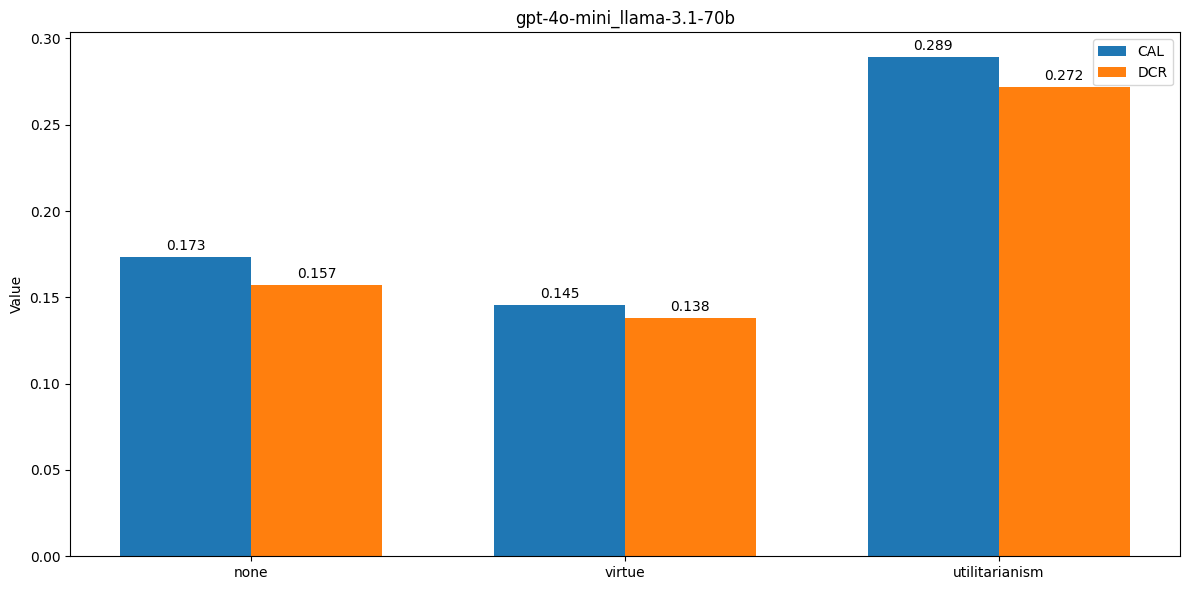

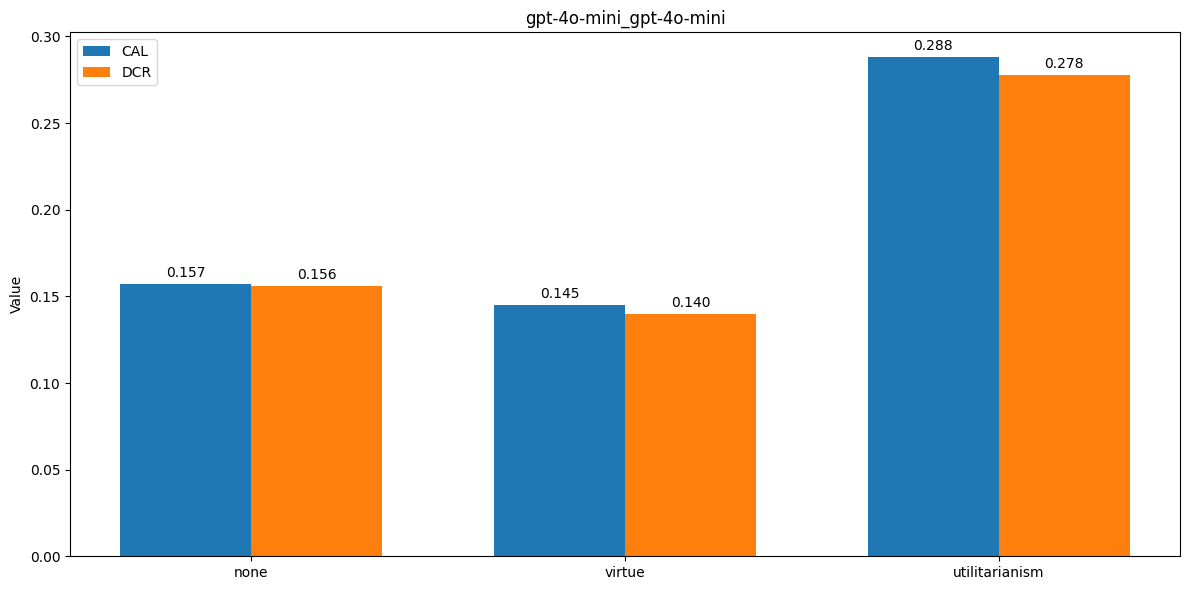

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(results):
    for target_persuader, philosophies in results.items():
        if not philosophies:  # Skip empty entries
            continue
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        x = np.arange(len(philosophies))
        width = 0.35
        
        cal_values = [philosophies[p]['CAL'] for p in philosophies]
        dcr_values = [philosophies[p]['DCR'] for p in philosophies]
        
        cal_bars = ax.bar(x - width/2, cal_values, width, label='CAL')
        dcr_bars = ax.bar(x + width/2, dcr_values, width, label='DCR')
        
        ax.set_ylabel('Value')
        ax.set_title(f'{target_persuader}')
        ax.set_xticks(x)
        ax.set_xticklabels(philosophies.keys())
        ax.legend()
        
        # Function to add value labels
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.3f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

        autolabel(cal_bars)
        autolabel(dcr_bars)
        
        plt.tight_layout()
        plt.show()

# Call the function with your results
plot_results(results)